<a href="https://colab.research.google.com/github/ChirahCasper/DataAnalysiswithpython/blob/main/Analysis(Trends%2C_Rate_of_evapoation_and_AI_adoption_Levels).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install graphviz


In [ ]:
from graphviz import Digraph

# Create a directed graph object
erd = Digraph('ERD', node_attr={'shape': 'record', 'fontsize': '12', 'style': 'filled', 'fillcolor': 'lightgrey'})

# Define entity nodes
erd.node('Doctor', '''{Doctor | Registrant Number | Name | Year of Birth | Sexual Orientation }''')
erd.node('Patient', '''{Patient | Serial Number | Name | Date of Birth | Sexual Orientation | Medicare Number | Personal Health Coverage Number | Company Cover }''')
erd.node('Consultation', '''{Consultation | Consultation Number | Date | Duration | Overview }''')
erd.node('Prescription', '''{Prescription | Consultation Number | Medication Name | Dose | Quantity of Repeats | Special Instructions }''')
erd.node('Referral', '''{Referral | Consultation Number | Procedure Name | Short Description | Referred Practitioner | Essential/Optional }''')
erd.node('Payments', '''{Payments | Payment Number | Date and Time | Amount | Method of Payment | Medicare ID}''')

# Define multi-valued attribute tables
erd.node('Doctor_Qualifications', '''{Doctor_Qualifications | Registrant Number | Qualification}''')
erd.node('Doctor_Specializations', '''{Doctor_Specializations | Registrant Number | Specialization}''')
erd.node('Patient_ContactInfo', '''{Patient_ContactInfo | Serial Number | Contact Info}''')
erd.node('Consultation_Symptoms', '''{Consultation_Symptoms | Consultation Number | Symptom}''')

# Define relationships
# Doctor-Consultation (M(m,1))
erd.edge('Doctor', 'Consultation', label='M(m,1)\n(Mandatory)', arrowhead='none', arrowsize='0.7')

# Patient-Consultation (M(m,1))
erd.edge('Patient', 'Consultation', label='M(m,1)\n(Mandatory)', arrowhead='none', arrowsize='0.7')

# Consultation-Prescription (M(m,1))
erd.edge('Consultation', 'Prescription', label='M(m,1)\n(Mandatory)', arrowhead='none', arrowsize='0.7')

# Consultation-Referral (M(m,1))
erd.edge('Consultation', 'Referral', label='M(m,1)\n(Mandatory)', arrowhead='none', arrowsize='0.7')

# Consultation-Payments (M(m,1))
erd.edge('Consultation', 'Payments', label='M(m,1)\n(Mandatory)', arrowhead='none', arrowsize='0.7')

# Doctor -> Doctor_Qualifications (1,m)
erd.edge('Doctor', 'Doctor_Qualifications', label='1,m\n(Mandatory)', arrowhead='none', arrowsize='0.7')

# Doctor -> Doctor_Specializations (1,m)
erd.edge('Doctor', 'Doctor_Specializations', label='1,m\n(Mandatory)', arrowhead='none', arrowsize='0.7')

# Patient -> Patient_ContactInfo (1,m)
erd.edge('Patient', 'Patient_ContactInfo', label='1,m\n(Mandatory)', arrowhead='none', arrowsize='0.7')

# Consultation -> Consultation_Symptoms (1,m)
erd.edge('Consultation', 'Consultation_Symptoms', label='1,m\n(Mandatory)', arrowhead='none', arrowsize='0.7')

# Render the ERD to a file
erd.render('medi_cine_erd', format='png', cleanup=True)

print("ERD diagram generated and saved as 'medi_cine_erd.png'")


ERD diagram generated and saved as 'medi_cine_erd.png'


<ipython-input-1-67dd60913657>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="User", y="Daily Steps", data=df, palette="Blues_d")


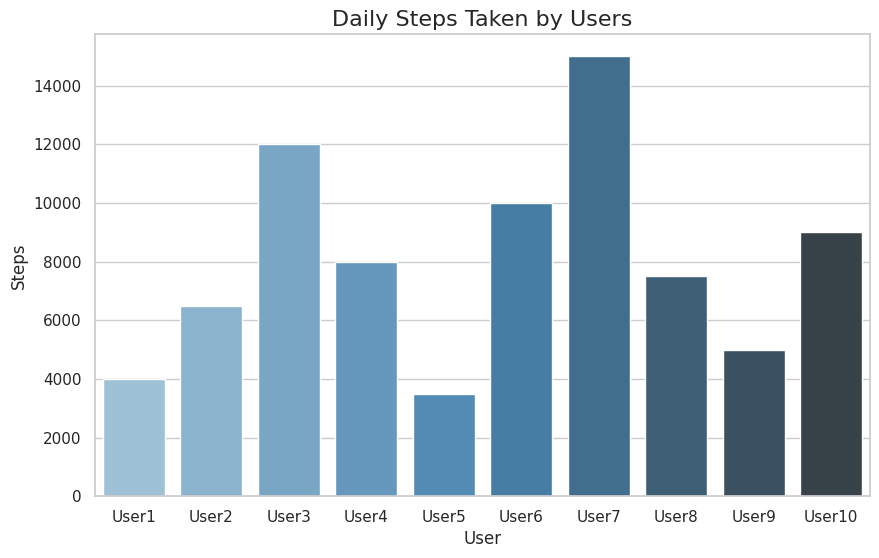

<ipython-input-1-67dd60913657>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="User", y="Sleep Hours", data=df, palette="Greens_d")


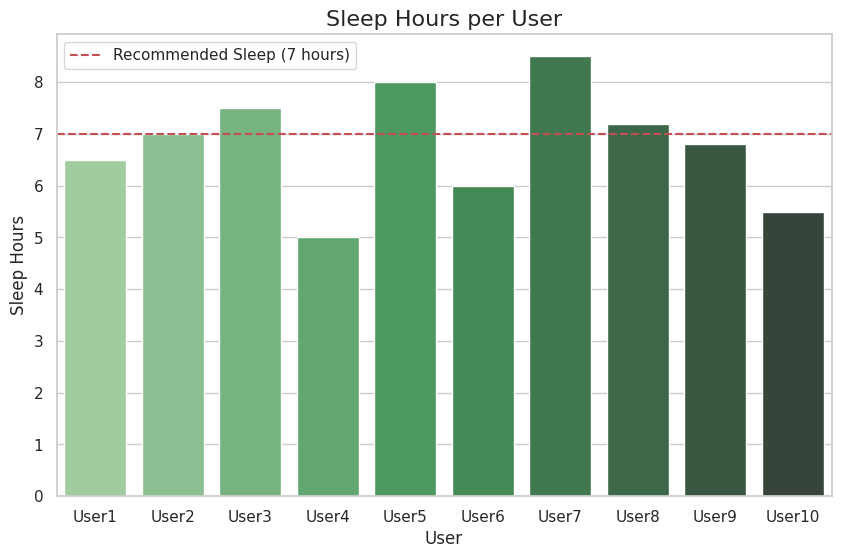

<ipython-input-1-67dd60913657>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="User", y="Resting Heart Rate (BPM)", data=df, palette="Reds_d")


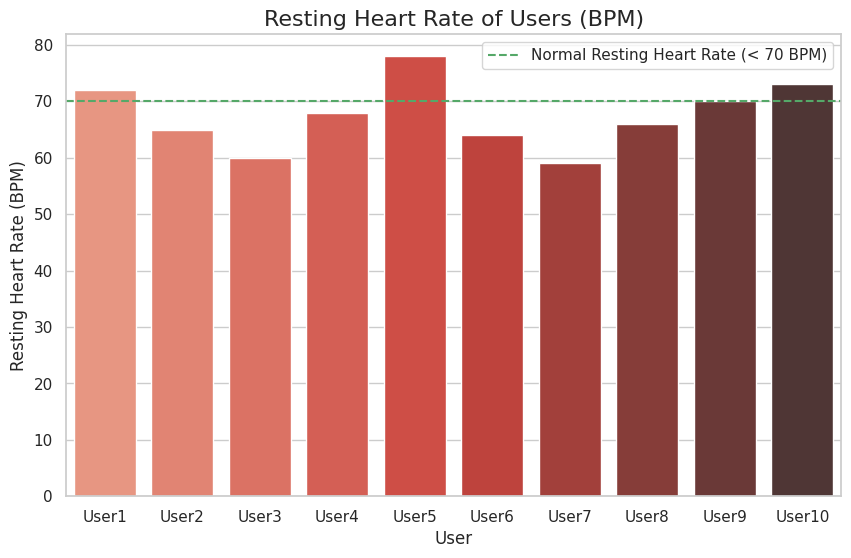

             Category                                      Trend                                                       Action
       Activity Level       Moderate Activity (Avg Steps: 8,000)      Encourage more physical activity to increase engagement
        Sleep Quality Good Sleep Quality (Avg Sleep: 6.85 hours) Promote sleep-tracking features as a way to improve wellness
Cardiovascular Health Healthy Heart Rate (Avg Resting BPM: 67.5)   Leverage heart rate monitoring in health-focused campaigns


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Hardcoded Data for Activity Levels, Sleep, and Heart Rate
data = {
    'User': ['User1', 'User2', 'User3', 'User4', 'User5', 'User6', 'User7', 'User8', 'User9', 'User10'],
    'Daily Steps': [4000, 6500, 12000, 8000, 3500, 10000, 15000, 7500, 5000, 9000],
    'Sleep Hours': [6.5, 7.0, 7.5, 5.0, 8.0, 6.0, 8.5, 7.2, 6.8, 5.5],
    'Resting Heart Rate (BPM)': [72, 65, 60, 68, 78, 64, 59, 66, 70, 73]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set style for seaborn
sns.set(style="whitegrid")

# Visualization 1: User Daily Activity Levels
plt.figure(figsize=(10, 6))
sns.barplot(x="User", y="Daily Steps", data=df, palette="Blues_d")
plt.title("Daily Steps Taken by Users", fontsize=16)
plt.xlabel("User", fontsize=12)
plt.ylabel("Steps", fontsize=12)
plt.show()

# Visualization 2: User Sleep Patterns
plt.figure(figsize=(10, 6))
sns.barplot(x="User", y="Sleep Hours", data=df, palette="Greens_d")
plt.title("Sleep Hours per User", fontsize=16)
plt.xlabel("User", fontsize=12)
plt.ylabel("Sleep Hours", fontsize=12)
plt.axhline(y=7, color='r', linestyle='--', label='Recommended Sleep (7 hours)')
plt.legend()
plt.show()

# Visualization 3: Resting Heart Rate by User
plt.figure(figsize=(10, 6))
sns.barplot(x="User", y="Resting Heart Rate (BPM)", data=df, palette="Reds_d")
plt.title("Resting Heart Rate of Users (BPM)", fontsize=16)
plt.xlabel("User", fontsize=12)
plt.ylabel("Resting Heart Rate (BPM)", fontsize=12)
plt.axhline(y=70, color='g', linestyle='--', label='Normal Resting Heart Rate (< 70 BPM)')
plt.legend()
plt.show()

# Create a Table to Show Current Trends
trend_data = {
    'Category': ['Activity Level', 'Sleep Quality', 'Cardiovascular Health'],
    'Trend': ['Moderate Activity (Avg Steps: 8,000)', 'Good Sleep Quality (Avg Sleep: 6.85 hours)',
              'Healthy Heart Rate (Avg Resting BPM: 67.5)'],
    'Action': ['Encourage more physical activity to increase engagement',
               'Promote sleep-tracking features as a way to improve wellness',
               'Leverage heart rate monitoring in health-focused campaigns']
}

trend_df = pd.DataFrame(trend_data)
print(trend_df.to_string(index=False))


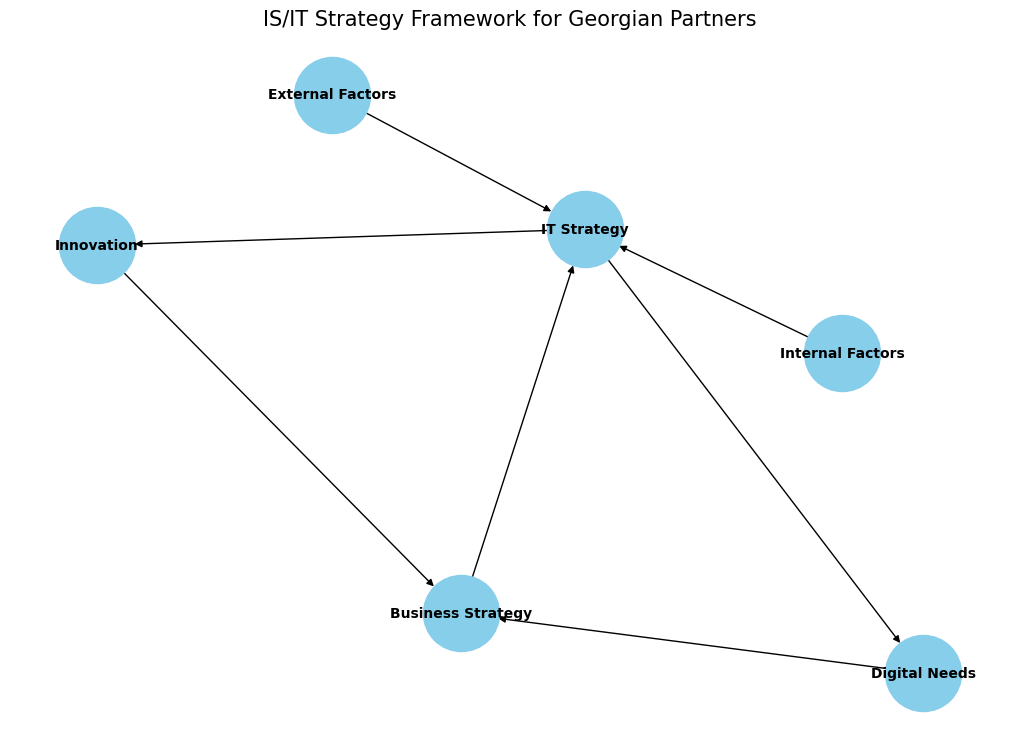

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define the key elements of the framework
elements = [
    "Business Strategy",
    "IT Strategy",
    "Digital Needs",
    "External Factors",
    "Internal Factors",
    "Innovation"
]

# Add nodes to the graph
G.add_nodes_from(elements)

# Define the relationships (edges) between the elements
edges = [
    ("Business Strategy", "IT Strategy"),
    ("IT Strategy", "Digital Needs"),
    ("IT Strategy", "Innovation"),
    ("Digital Needs", "Business Strategy"),
    ("External Factors", "IT Strategy"),
    ("Internal Factors", "IT Strategy"),
    ("Innovation", "Business Strategy"),
]

# Add edges to the graph
G.add_edges_from(edges)

# Set the position of nodes
pos = nx.spring_layout(G)

# Draw the nodes and edges
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)

# Set title and show the plot
plt.title('IS/IT Strategy Framework for Georgian Partners', fontsize=15)
plt.axis('off')  # Turn off the axis
plt.show()


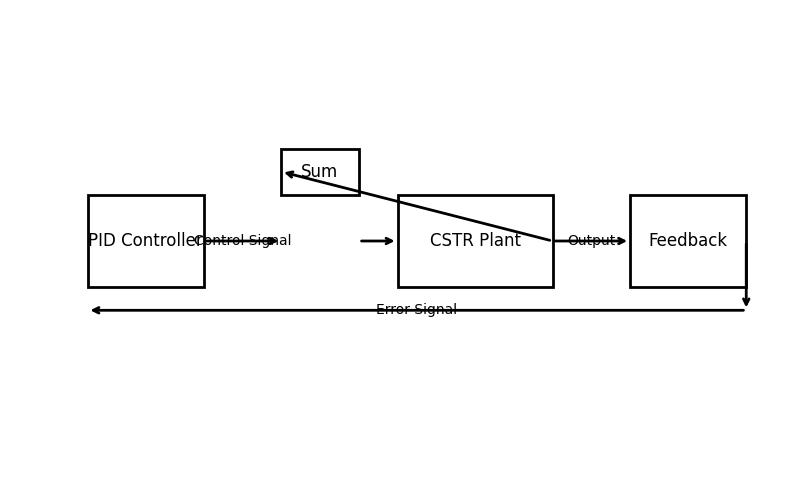

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Function to draw a block
def draw_block(ax, xy, width, height, label):
    rect = patches.Rectangle(xy, width, height, linewidth=2, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
    ax.text(xy[0] + width/2, xy[1] + height/2, label, fontsize=12, ha='center', va='center')

# Function to draw an arrow
def draw_arrow(ax, start, end, text=None):
    ax.annotate("",
                xy=end, xycoords='data',
                xytext=start, textcoords='data',
                arrowprops=dict(arrowstyle="->", lw=2))
    if text:
        ax.text((start[0] + end[0])/2, (start[1] + end[1])/2, text, fontsize=10, ha='center', va='center')

# Draw blocks (Controller, Plant, Sum)
draw_block(ax, [0.1, 0.4], 0.15, 0.2, "PID Controller")
draw_block(ax, [0.5, 0.4], 0.2, 0.2, "CSTR Plant")
draw_block(ax, [0.35, 0.6], 0.1, 0.1, "Sum")

# Draw feedback path
draw_block(ax, [0.8, 0.4], 0.15, 0.2, "Feedback")

# Draw arrows for connections
draw_arrow(ax, [0.25, 0.5], [0.35, 0.5], "Control Signal")
draw_arrow(ax, [0.45, 0.5], [0.5, 0.5])
draw_arrow(ax, [0.7, 0.5], [0.8, 0.5], "Output")
draw_arrow(ax, [0.95, 0.5], [0.95, 0.35])
draw_arrow(ax, [0.95, 0.35], [0.1, 0.35], "Error Signal")

# Draw the feedback path from the plant output back to the summation point
draw_arrow(ax, [0.7, 0.5], [0.35, 0.65])

# Set limits and hide axis
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.axis('off')

# Show plot
plt.show()


In [ ]:
pip install graphviz


In [ ]:
from graphviz import Digraph

# Create a new directed graph
diagram = Digraph('ControlSystem')

# Define the nodes (blocks)
diagram.node('A', 'Vs (Voltage Source A)')
diagram.node('B', 'Vb (Voltage Source B)')
diagram.node('C', 'Vc (Voltage Source C)')
diagram.node('D', 'abc to dq0 Block')
diagram.node('E', 'Motor Block')
diagram.node('F', 'Torque Block')
diagram.node('G', 'Current Block')
diagram.node('H', 'Speed Block')
diagram.node('I', 'Load Torque')

# Healthy signals
diagram.node('HS1', 'Is Healthy')
diagram.node('HS2', 'Te Healthy')
diagram.node('HS3', 'N Healthy')

# Define the connections (arrows)
diagram.edge('A', 'D')
diagram.edge('B', 'D')
diagram.edge('C', 'D')
diagram.edge('D', 'E')
diagram.edge('E', 'F')
diagram.edge('E', 'G')
diagram.edge('G', 'F')
diagram.edge('F', 'H')
diagram.edge('I', 'H')

# Connect the healthy outputs
diagram.edge('G', 'HS1')
diagram.edge('F', 'HS2')
diagram.edge('H', 'HS3')

# View or save the result
diagram.render(filename='control_system_diagram', format='png', cleanup=True)


'control_system_diagram.png'

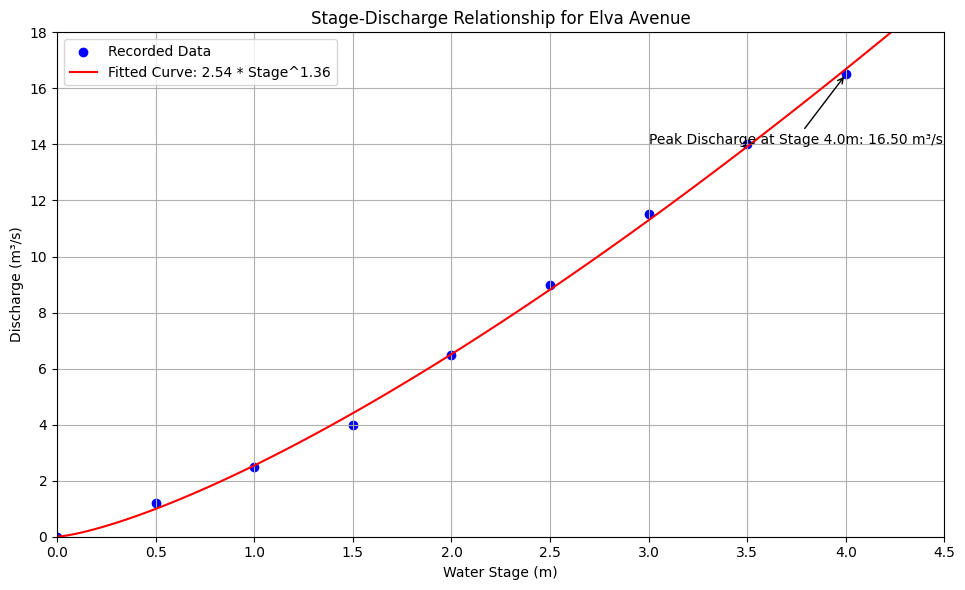

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample data: Stage (meters) and Discharge (m³/s)
stage = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
discharge = np.array([0.0, 1.2, 2.5, 4.0, 6.5, 9.0, 11.5, 14.0, 16.5])

# Define a power function to fit the data
def power_func(x, a, b):
    return a * x ** b

# Fit the curve to the data
params, covariance = curve_fit(power_func, stage, discharge)
a, b = params

# Generate x values for the fitted curve
stage_fit = np.linspace(0, 4.5, 100)
discharge_fit = power_func(stage_fit, a, b)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(stage, discharge, color='blue', label='Recorded Data', marker='o')
plt.plot(stage_fit, discharge_fit, color='red', label=f'Fitted Curve: {a:.2f} * Stage^{b:.2f}')
plt.title('Stage-Discharge Relationship for Elva Avenue')
plt.xlabel('Water Stage (m)')
plt.ylabel('Discharge (m³/s)')
plt.grid()
plt.legend()
plt.xlim(0, 4.5)
plt.ylim(0, 18)
plt.annotate(f'Peak Discharge at Stage 4.0m: {discharge[np.argmax(stage == 4.0)]:.2f} m³/s',
             xy=(4.0, discharge[np.argmax(stage == 4.0)]),
             xytext=(3.0, 14.0),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.tight_layout()
plt.show()


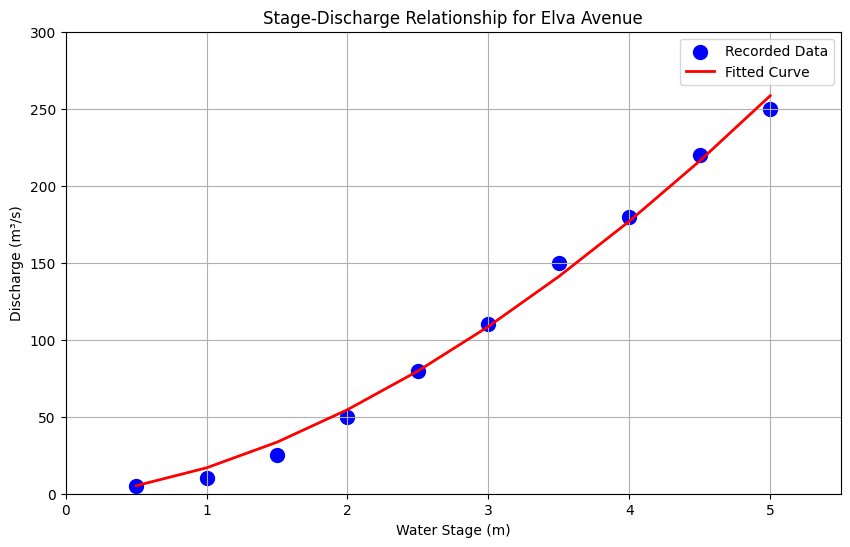

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample stage and discharge data (stage in meters, discharge in cubic meters per second)
stage = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
discharge = np.array([5.0, 10.0, 25.0, 50.0, 80.0, 110.0, 150.0, 180.0, 220.0, 250.0])

# Fit a power function to the data
def power_func(x, a, b):
    return a * np.power(x, b)

# Curve fitting
params, covariance = curve_fit(power_func, stage, discharge)
fitted_discharge = power_func(stage, *params)

# Plotting the stage-discharge relationship
plt.figure(figsize=(10, 6))
plt.scatter(stage, discharge, color='blue', label='Recorded Data', s=100)
plt.plot(stage, fitted_discharge, color='red', label='Fitted Curve', linewidth=2)
plt.title('Stage-Discharge Relationship for Elva Avenue')
plt.xlabel('Water Stage (m)')
plt.ylabel('Discharge (m³/s)')
plt.grid()
plt.legend()
plt.xlim(0, 5.5)
plt.ylim(0, 300)
plt.show()


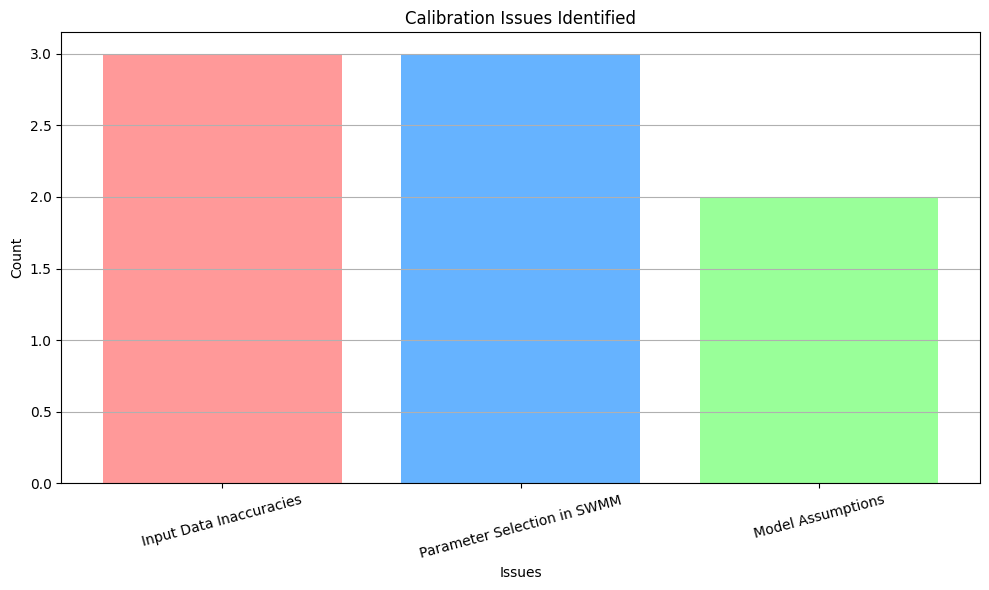

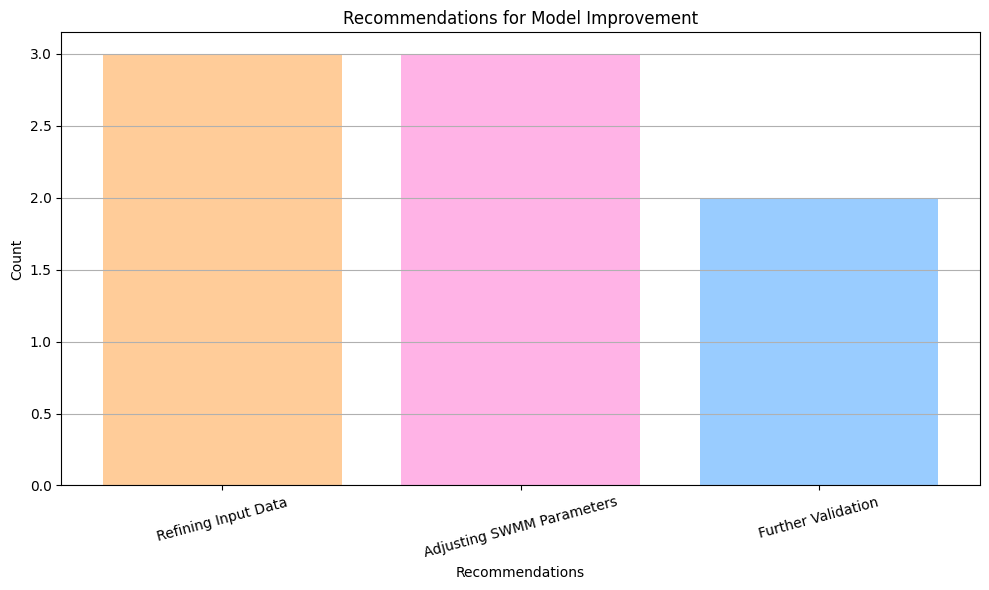

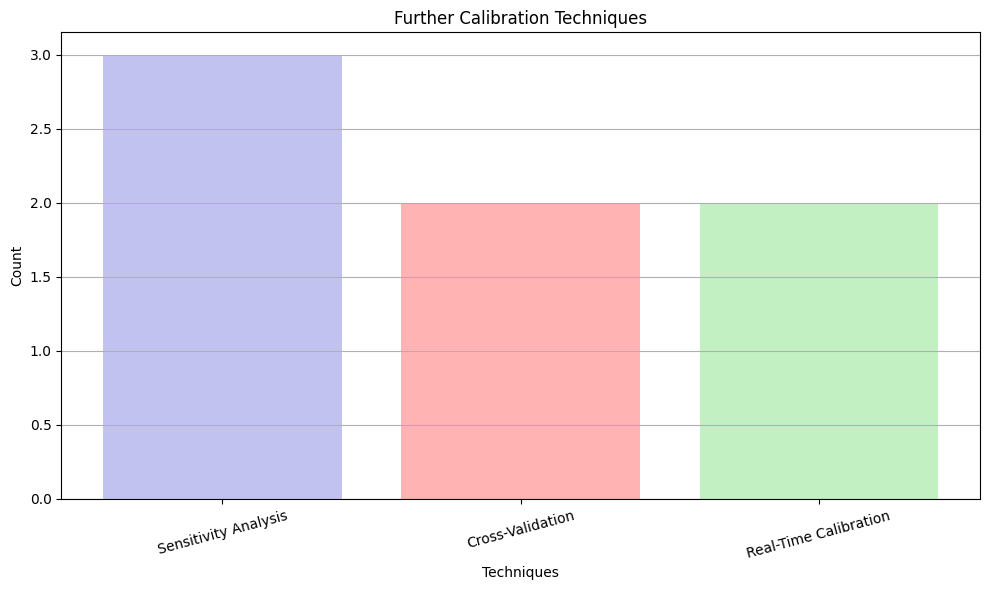

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Slide 12: Calibration Issues Identified
calibration_issues = [
    'Input Data Inaccuracies',
    'Parameter Selection in SWMM',
    'Model Assumptions'
]

# Count of issues identified (example values)
issues_count = [3, 3, 2]

# Creating the bar graph for Slide 12
plt.figure(figsize=(10, 6))
plt.bar(calibration_issues, issues_count, color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title('Calibration Issues Identified')
plt.xlabel('Issues')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('calibration_issues.png')  # Save the figure
plt.show()

# Data for Slide 13: Recommendations for Model Improvement
model_improvement_recommendations = [
    'Refining Input Data',
    'Adjusting SWMM Parameters',
    'Further Validation'
]

# Count of recommendations (example values)
recommendations_count = [3, 3, 2]

# Creating the bar graph for Slide 13
plt.figure(figsize=(10, 6))
plt.bar(model_improvement_recommendations, recommendations_count, color=['#FFCC99', '#FFB3E6', '#99CCFF'])
plt.title('Recommendations for Model Improvement')
plt.xlabel('Recommendations')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('model_improvement_recommendations.png')  # Save the figure
plt.show()

# Data for Slide 14: Further Calibration Techniques
calibration_techniques = [
    'Sensitivity Analysis',
    'Cross-Validation',
    'Real-Time Calibration'
]

# Count of techniques (example values)
techniques_count = [3, 2, 2]

# Creating the bar graph for Slide 14
plt.figure(figsize=(10, 6))
plt.bar(calibration_techniques, techniques_count, color=['#C2C2F0', '#FFB3B3', '#C2F0C2'])
plt.title('Further Calibration Techniques')
plt.xlabel('Techniques')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('further_calibration_techniques.png')  # Save the figure
plt.show()


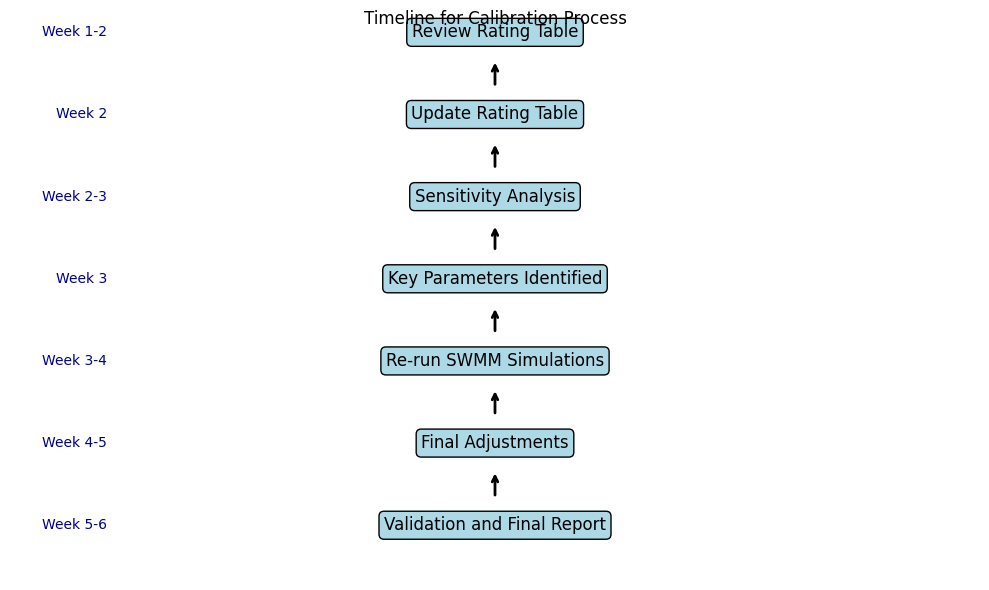

In [ ]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Timeline for Calibration Process')

# Create a list of steps and associated weeks
steps = [
    ("Review Rating Table", "Week 1-2"),
    ("Update Rating Table", "Week 2"),
    ("Sensitivity Analysis", "Week 2-3"),
    ("Key Parameters Identified", "Week 3"),
    ("Re-run SWMM Simulations", "Week 3-4"),
    ("Final Adjustments", "Week 4-5"),
    ("Validation and Final Report", "Week 5-6")
]

# Define text positions
y_positions = [1 - i * 0.15 for i in range(len(steps))]

# Plot the timeline with steps and corresponding weeks
for i, (step, week) in enumerate(steps):
    # Add text for each step
    plt.text(0.5, y_positions[i], step, fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightblue'))
    plt.text(0.1, y_positions[i], week, fontsize=10, ha='right', va='center', color='darkblue')

    # Add arrows between the steps
    if i < len(steps) - 1:
        plt.annotate('', xy=(0.5, y_positions[i] - 0.05), xytext=(0.5, y_positions[i] - 0.1),
                     arrowprops=dict(arrowstyle="->", lw=2))

# Set axis limits and hide axis
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Show the flowchart
plt.tight_layout()
plt.show()


In [ ]:
# Given values for arrival rate (λ) and service rate (μ)
arrival_rate = 500000  # cars/hour (λ)
service_rate = 1.5  # cars/hour (μ)

# Traffic intensity (ρ)
traffic_intensity = arrival_rate / service_rate

# Wait time in the queue (Wq) for M/M/1 system is given by: Wq = (ρ / (μ * (1 - ρ)))
# In this case, because ρ > 1 (overload condition), we cannot calculate Wq directly as it would be infinite.
# But let's calculate Wq under normal conditions for reference:

if traffic_intensity < 1:
    wait_time_in_queue = traffic_intensity / (service_rate * (1 - traffic_intensity))
else:
    wait_time_in_queue = float('inf')  # infinite wait time due to system overload

# Number of cars in line (Lq) for M/M/1 system is given by: Lq = ρ^2 / (1 - ρ)
if traffic_intensity < 1:
    cars_in_queue = traffic_intensity**2 / (1 - traffic_intensity)
else:
    cars_in_queue = float('inf')  # infinite queue size due to overload

wait_time_in_queue, cars_in_queue


(inf, inf)

In [ ]:
import turtle

# Function to draw an array of blocks
def draw_array(rows, cols):
    turtle.speed(1)  # Set the drawing speed
    block_size = 30   # Size of each block

    for row in range(rows):
        for col in range(cols):
            # Draw a block (square)
            turtle.penup()
            turtle.goto(col * block_size, -row * block_size)  # Position the turtle
            turtle.pendown()
            for _ in range(4):  # Draw a square
                turtle.forward(block_size)
                turtle.right(90)

    # Move the turtle to the starting position for the total block text
    turtle.penup()
    turtle.goto(-block_size * cols / 2, -rows * block_size - 20)  # Position below the blocks
    turtle.pendown()
    total_blocks = rows * cols
    turtle.write(f"Total blocks: {total_blocks} (which is {rows} × {cols} = {total_blocks})", align="center", font=("Arial", 16, "normal"))

# Function for the game
def multiplication_game():
    rows = int(input("Enter number of rows (1-6): "))
    cols = int(input("Enter number of columns (1-6): "))

    # Clear the screen and draw the array
    turtle.clear()
    draw_array(rows, cols)

    # Wait for user to close the turtle graphics window
    turtle.done()

# Start the game
multiplication_game()


Enter number of rows (1-6): 6
Enter number of columns (1-6): 4


TclError: no display name and no $DISPLAY environment variable

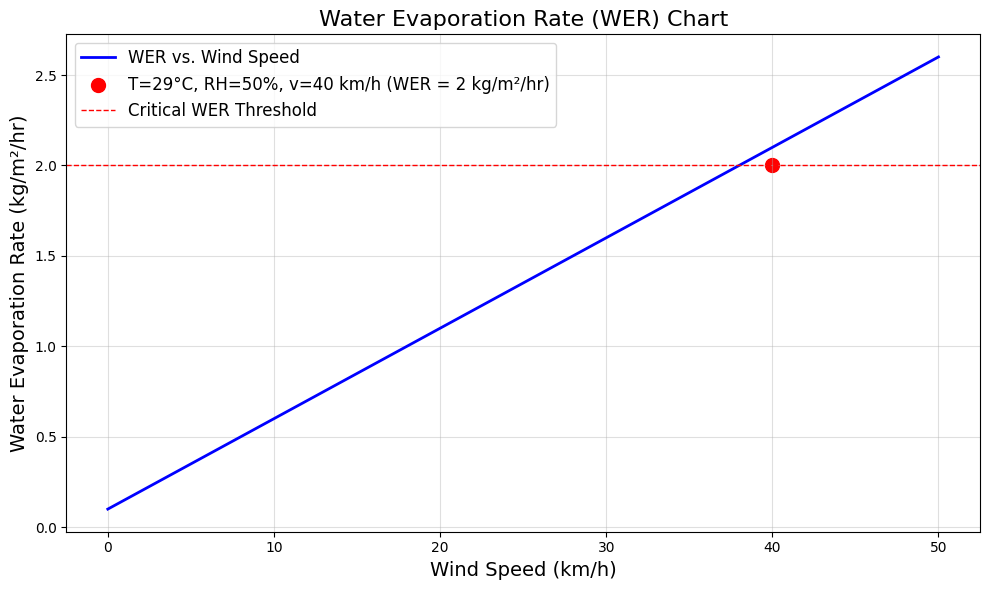

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for chart (hypothetical values based on WER formula or table)
# X-axis: Wind Speed (km/h)
wind_speeds = np.linspace(0, 50, 100)
# Y-axis: Water Evaporation Rate (WER) [kg/m^2/hr]
wer_values = 0.1 + (0.05 * wind_speeds)  # Example relation: WER increases with wind speed

# Highlight the specific point (T=29°C, RH=50%, v=40 km/h)
specific_wind_speed = 40
specific_wer = 2  # WER value given in the problem

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(wind_speeds, wer_values, label="WER vs. Wind Speed", color="blue", linewidth=2)
plt.scatter(specific_wind_speed, specific_wer, color="red", label=f"T=29°C, RH=50%, v=40 km/h (WER = {specific_wer} kg/m²/hr)", s=100)

# Add chart details
plt.title("Water Evaporation Rate (WER) Chart", fontsize=16)
plt.xlabel("Wind Speed (km/h)", fontsize=14)
plt.ylabel("Water Evaporation Rate (kg/m²/hr)", fontsize=14)
plt.axhline(y=specific_wer, color='red', linestyle='--', linewidth=1, label="Critical WER Threshold")
plt.grid(alpha=0.4)
plt.legend(fontsize=12)
plt.tight_layout()

# Save and show the plot
plt.savefig("WER_chart.png", dpi=300)  # Save the chart as an image
plt.show()


In [ ]:
!pip install xlsxwriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install numpy-financial


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import fsolve
import xlsxwriter

# Constants
LAND_RENT = 90000  # Opportunity cost
MACHINE_COST = 320000
NUM_MACHINES = 8
STORAGE_COST = 600000
INITIAL_WORKING_CAPITAL = 100000
MAINTENANCE_COST_PER_MACHINE = 20000
PRODUCTION_YEARS = 6
ADMIN_COST_INCREASE = 0.4
ADMIN_COST_BASE = 550000
FIXED_COSTS = 250000
LABOR_RATE = 35  # per hour
LABOR_HOURS = 8 * 200  # 200 days, 8 hours/day
TAX_RATE = 0.3
SALVAGE_VALUE = 1200000  # at the end of year 6

# Revenue and cost projections
production_quantity = [320, 350, 360, 370, 350, 340]
sale_price = [9200, 9300, 9400, 9500, 9600, 9700]
material_cost_base = 2080
material_cost_growth = 0.035

# Discount rate placeholder
WACC = 0.08  # Assume 8% initially, will be calculated later

# Step 1: Initial Investment
initial_investment = (MACHINE_COST * NUM_MACHINES + STORAGE_COST + INITIAL_WORKING_CAPITAL)

# Step 2: Operating Cash Flows
cash_flows = []
for year in range(PRODUCTION_YEARS):
    revenue = production_quantity[year] * sale_price[year]
    material_cost = material_cost_base * (1 + material_cost_growth) ** year
    total_material_cost = production_quantity[year] * material_cost

    labor_cost = NUM_MACHINES * LABOR_RATE * LABOR_HOURS
    fixed_admin_cost = ADMIN_COST_BASE * (1 + ADMIN_COST_INCREASE)

    total_costs = total_material_cost + labor_cost + fixed_admin_cost + FIXED_COSTS + (NUM_MACHINES * MAINTENANCE_COST_PER_MACHINE)
    ebit = revenue - total_costs
    tax = ebit * TAX_RATE if ebit > 0 else 0
    net_operating_cash_flow = ebit - tax + (MACHINE_COST * NUM_MACHINES / PRODUCTION_YEARS)
    cash_flows.append(net_operating_cash_flow)

# Add terminal value to the last year's cash flow
cash_flows[-1] += SALVAGE_VALUE

# Step 3: Payback Period
cumulative_cash_flow = np.cumsum(cash_flows)
payback_period = np.argmax(cumulative_cash_flow >= initial_investment) + 1  # Add 1 to account for year indexing

# Step 4: NPV and IRR
cash_flows_with_initial = [-initial_investment] + cash_flows
npv = np.npv(WACC, cash_flows_with_initial)

def calculate_irr(cash_flows):
    irr_function = lambda r: np.npv(r, cash_flows)
    irr = fsolve(irr_function, x0=0.1)[0]
    return irr

irr = calculate_irr(cash_flows_with_initial)

# Step 5: Sensitivity Analysis
scenarios = {
    "Sales Quantity -10%": [(qty * 0.9) for qty in production_quantity],
    "Sale Price +5%": [(price * 1.05) for price in sale_price],
    "Material Costs +4.5% Growth": 0.045,
    "Inflation 3%": 0.03
}

sensitivity_results = {}
for scenario, adjustment in scenarios.items():
    adj_cash_flows = []
    for year in range(PRODUCTION_YEARS):
        if scenario == "Sales Quantity -10%":
            revenue = adjustment[year] * sale_price[year]
        elif scenario == "Sale Price +5%":
            revenue = production_quantity[year] * adjustment[year]
        elif scenario == "Material Costs +4.5% Growth":
            material_cost = material_cost_base * (1 + adjustment) ** year
            total_material_cost = production_quantity[year] * material_cost
        elif scenario == "Inflation 3%":
            fixed_admin_cost = ADMIN_COST_BASE * (1 + adjustment) ** year

        total_costs = total_material_cost + labor_cost + fixed_admin_cost + FIXED_COSTS + (NUM_MACHINES * MAINTENANCE_COST_PER_MACHINE)
        ebit = revenue - total_costs
        tax = ebit * TAX_RATE if ebit > 0 else 0
        adj_cash_flows.append(ebit - tax)

    adj_cash_flows[-1] += SALVAGE_VALUE
    sensitivity_results[scenario] = np.npv(WACC, [-initial_investment] + adj_cash_flows)

# Export results to Excel
output_file = "BAC_Farm_Project_Analysis.xlsx"
workbook = xlsxwriter.Workbook(output_file)
worksheet = workbook.add_worksheet("Summary")

# Write headers and results
worksheet.write(0, 0, "Metric")
worksheet.write(0, 1, "Value")
worksheet.write(1, 0, "Initial Investment")
worksheet.write(1, 1, initial_investment)
worksheet.write(2, 0, "Payback Period (Years)")
worksheet.write(2, 1, payback_period)
worksheet.write(3, 0, "NPV")
worksheet.write(3, 1, npv)
worksheet.write(4, 0, "IRR")
worksheet.write(4, 1, irr)

# Sensitivity Analysis Results
row = 6
worksheet.write(row, 0, "Scenario")
worksheet.write(row, 1, "NPV")
for scenario, result in sensitivity_results.items():
    row += 1
    worksheet.write(row, 0, scenario)
    worksheet.write(row, 1, result)

workbook.close()

print(f"Analysis completed. Results saved to {output_file}.")


<ipython-input-7-131b499fc267>:59: DeprecationWarning: In accordance with NEP 32, the function npv was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial library: https://pypi.org/project/numpy-financial
  npv = np.npv(WACC, cash_flows_with_initial)


RuntimeError: In accordance with NEP 32, the function npv was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial library: https://pypi.org/project/numpy-financial

In [ ]:
from graphviz import Digraph

def create_org_chart():
    dot = Digraph()
    dot.attr(rankdir='TB')  # Top to Bottom layout

    # Adding nodes
    dot.node('CEO', 'Chief Executive Officer (CEO)', shape='box', style='filled', fillcolor='lightblue')
    dot.node('CTO', 'Chief Technology Officer (CTO)', shape='box', style='filled', fillcolor='lightgrey')
    dot.node('Marketing', 'Director of Marketing and Sales', shape='box', style='filled', fillcolor='lightgrey')
    dot.node('Customer', 'Director of Customer Success', shape='box', style='filled', fillcolor='lightgrey')

    # Adding edges (relationships)
    dot.edge('CEO', 'CTO')
    dot.edge('CEO', 'Marketing')
    dot.edge('CEO', 'Customer')

    return dot

# Generate and render the organizational chart
org_chart = create_org_chart()
org_chart.render('organizational_structure', format='png', cleanup=False)  # Saves as PNG


'organizational_structure.png'

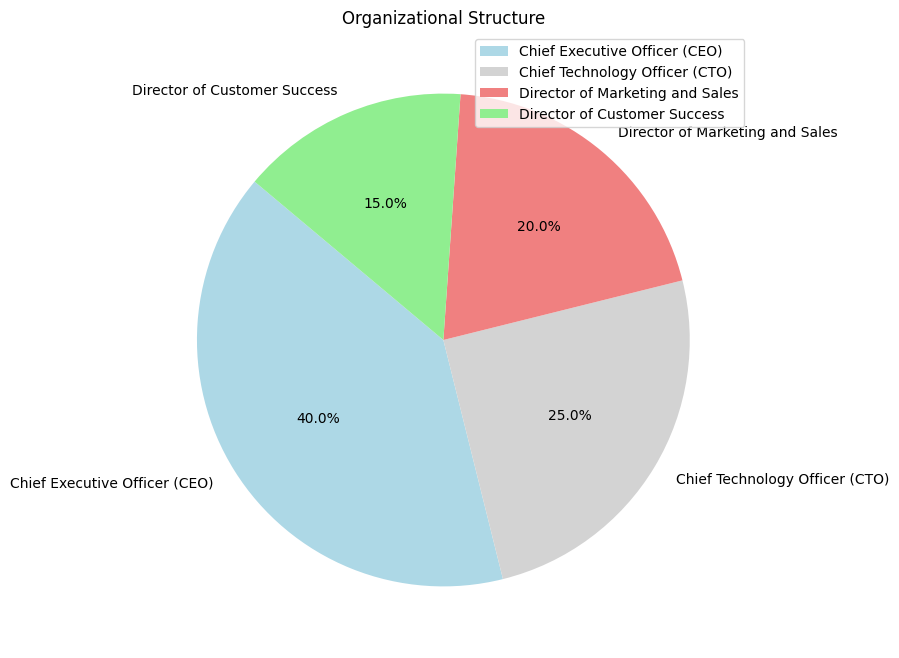

In [ ]:
import matplotlib.pyplot as plt

def create_pie_chart():
    labels = ['Chief Executive Officer (CEO)', 'Chief Technology Officer (CTO)', 'Director of Marketing and Sales', 'Director of Customer Success']
    sizes = [40, 25, 20, 15]  # Example proportions
    colors = ['lightblue', 'lightgrey', 'lightcoral', 'lightgreen']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.legend(labels, loc='upper right')
    plt.title('Organizational Structure')
    plt.show()

# Generate and display the pie chart
create_pie_chart()


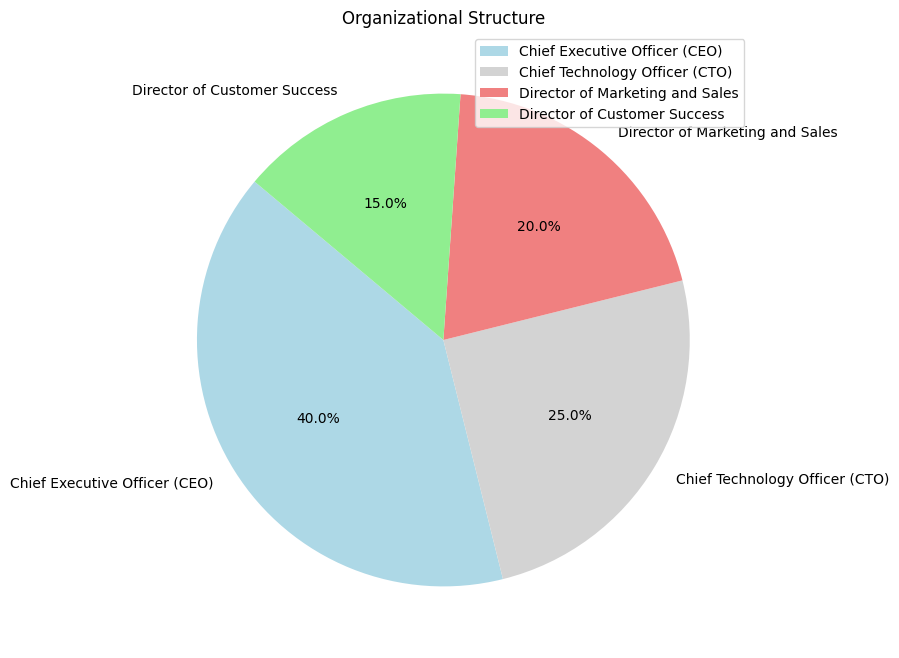

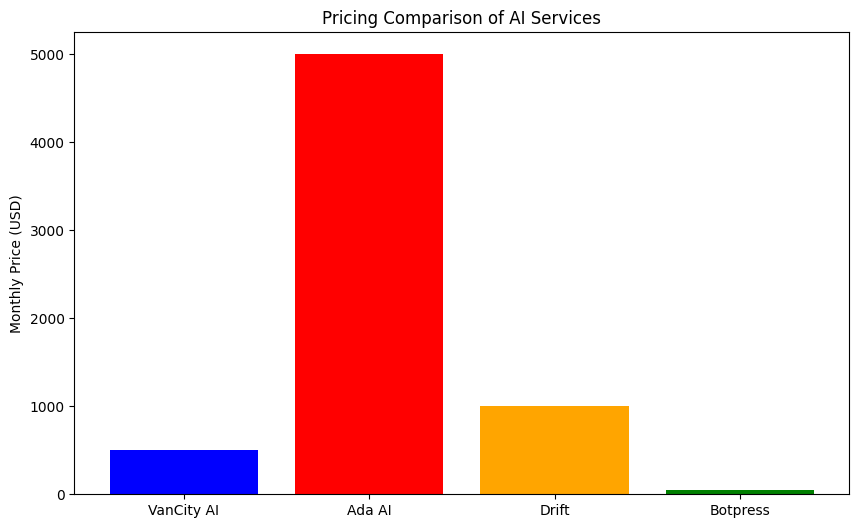

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def create_pie_chart():
    labels = ['Chief Executive Officer (CEO)', 'Chief Technology Officer (CTO)', 'Director of Marketing and Sales', 'Director of Customer Success']
    sizes = [40, 25, 20, 15]  # Example proportions
    colors = ['lightblue', 'lightgrey', 'lightcoral', 'lightgreen']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.legend(labels, loc='upper right')
    plt.title('Organizational Structure')
    plt.show()

def create_pricing_comparison_chart():
    companies = ['VanCity AI', 'Ada AI', 'Drift', 'Botpress']
    prices = [500, 5000, 1000, 50]  # Monthly pricing in USD

    x = np.arange(len(companies))

    plt.figure(figsize=(10, 6))
    plt.bar(x, prices, color=['blue', 'red', 'orange', 'green'])
    plt.xticks(x, companies)
    plt.ylabel('Monthly Price (USD)')
    plt.title('Pricing Comparison of AI Services')
    plt.show()

# Generate and display the pie chart
create_pie_chart()
# Generate and display the pricing comparison chart
create_pricing_comparison_chart()

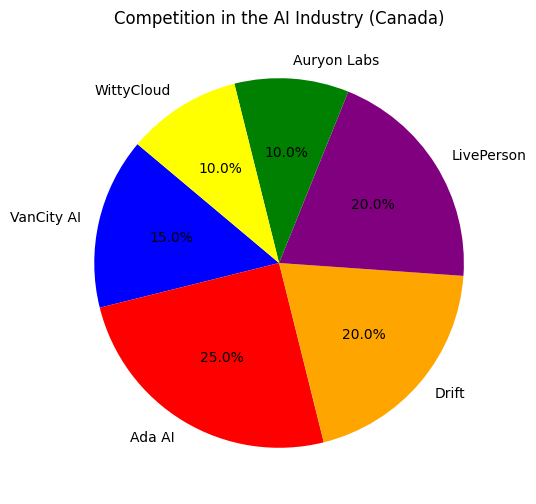

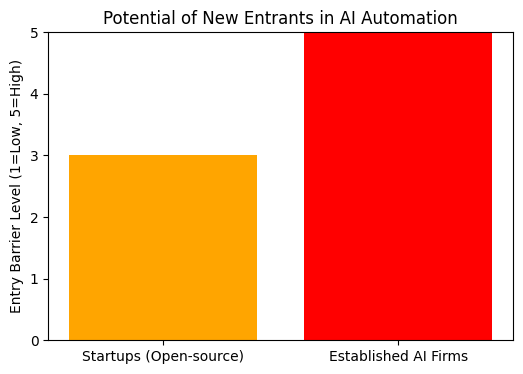

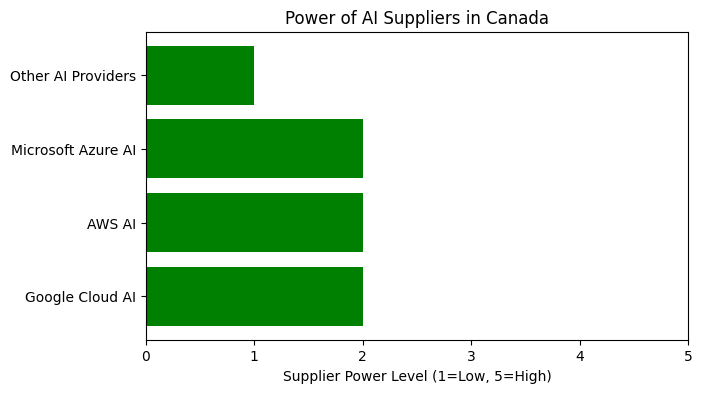

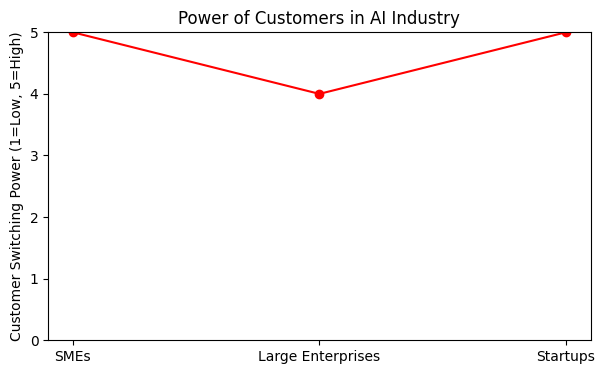

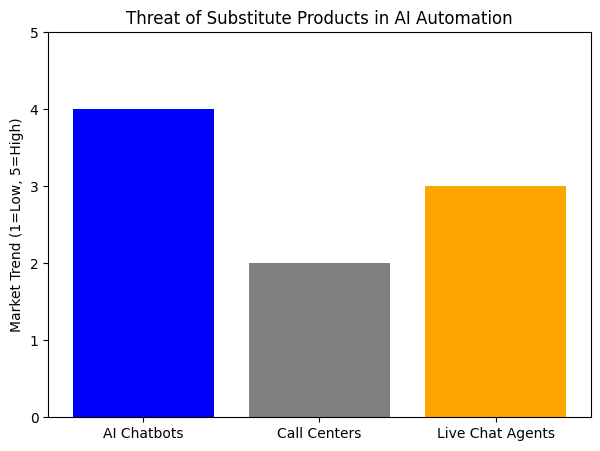

In [ ]:
import matplotlib.pyplot as plt

# 1. Competition in the Industry - Pie Chart
plt.figure(figsize=(6, 6))
labels = ['VanCity AI', 'Ada AI', 'Drift', 'LivePerson', 'Auryon Labs', 'WittyCloud']
sizes = [15, 25, 20, 20, 10, 10]  # Market share estimates
colors = ['blue', 'red', 'orange', 'purple', 'green', 'yellow']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Competition in the AI Industry (Canada)')
plt.show()

# 2. Potential of New Entrants - Bar Chart
companies = ['Startups (Open-source)', 'Established AI Firms']
barriers = [3, 5]  # 1 = Low barrier, 5 = High barrier
plt.figure(figsize=(6, 4))
plt.bar(companies, barriers, color=['orange', 'red'])
plt.ylabel('Entry Barrier Level (1=Low, 5=High)')
plt.title('Potential of New Entrants in AI Automation')
plt.ylim(0, 5)
plt.show()

# 3. Power of Suppliers - Horizontal Bar Chart
suppliers = ['Google Cloud AI', 'AWS AI', 'Microsoft Azure AI', 'Other AI Providers']
supplier_power = [2, 2, 2, 1]  # Low power
plt.figure(figsize=(7, 4))
plt.barh(suppliers, supplier_power, color='green')
plt.xlabel('Supplier Power Level (1=Low, 5=High)')
plt.title('Power of AI Suppliers in Canada')
plt.xlim(0, 5)
plt.show()

# 4. Power of Customers - Line Chart
customer_types = ['SMEs', 'Large Enterprises', 'Startups']
switching_power = [5, 4, 5]  # Higher values mean easier to switch
plt.figure(figsize=(7, 4))
plt.plot(customer_types, switching_power, marker='o', linestyle='-', color='red')
plt.ylabel('Customer Switching Power (1=Low, 5=High)')
plt.title('Power of Customers in AI Industry')
plt.ylim(0, 5)
plt.show()

# 5. Threat of Substitute Products - Stacked Bar Chart
solutions = ['AI Chatbots', 'Call Centers', 'Live Chat Agents']
market_trend = [4, 2, 3]  # AI adoption is high, call centers are declining
plt.figure(figsize=(7, 5))
plt.bar(solutions, market_trend, color=['blue', 'gray', 'orange'])
plt.ylabel('Market Trend (1=Low, 5=High)')
plt.title('Threat of Substitute Products in AI Automation')
plt.ylim(0, 5)
plt.show()


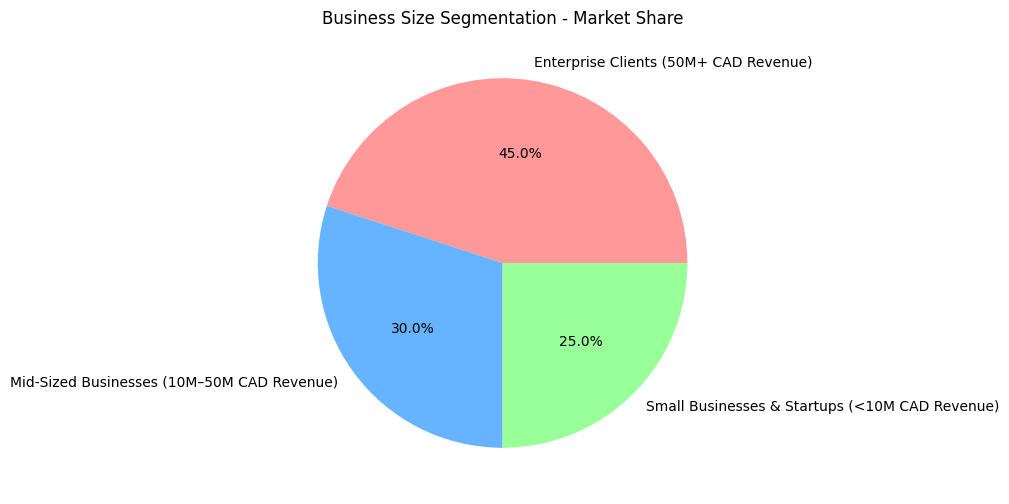

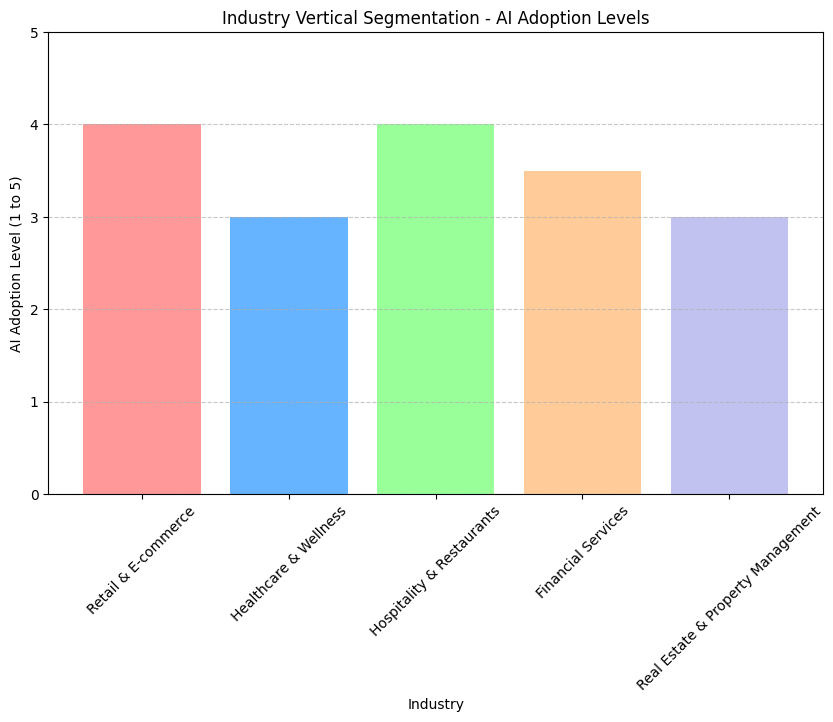

In [ ]:
import matplotlib.pyplot as plt

# Business Size Segmentation Pie Chart
business_segments = ["Enterprise Clients (50M+ CAD Revenue)",
                     "Mid-Sized Businesses (10M–50M CAD Revenue)",
                     "Small Businesses & Startups (<10M CAD Revenue)"]
market_shares = [45, 30, 25]

plt.figure(figsize=(8, 6))
plt.pie(market_shares, labels=business_segments, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Business Size Segmentation - Market Share")
plt.show()

# Industry Vertical Segmentation Bar Chart
industries = ["Retail & E-commerce", "Healthcare & Wellness", "Hospitality & Restaurants",
              "Financial Services", "Real Estate & Property Management"]
ai_adoption_levels = [4, 3, 4, 3.5, 3]  # Scale from 1 (Low) to 5 (High)

plt.figure(figsize=(10, 6))
plt.bar(industries, ai_adoption_levels, color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.xlabel("Industry")
plt.ylabel("AI Adoption Level (1 to 5)")
plt.title("Industry Vertical Segmentation - AI Adoption Levels")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
